Zomato

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib

In [ ]:
zomato_data=pd.read_csv('zomato.csv',encoding='latin-1')

In [ ]:
zomato_data.head()

In [ ]:
zomato_data.columns

In [ ]:
zomato_data.info()

In [ ]:
zomato_data.describe()

In [ ]:
zomato_data.isna().sum()

In [ ]:
zomato_data['Cuisines'].value_counts()

In [ ]:
zomato_data['Cuisines'].nunique()

In [ ]:
[feature for feature in zomato_data.columns if zomato_data[feature].isna().sum()>1]

The heatmap is not working because the cusines features are missing only 9 values out of some 9000+ values

In [ ]:
zomato_data.shape

In [ ]:
sns.heatmap(zomato_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
zomato_country=pd.read_excel("Country-Code.xlsx")

In [ ]:
zomato_country.head()

In [ ]:
zomato_country.columns

Since there are common columns in both the excel we will merge on the common feature in both the excels

In [ ]:
final_data=pd.merge(zomato_data,zomato_country,on='Country Code',how='left')

In [ ]:
final_data.head(1)

In [ ]:
[f for f in final_data.columns if final_data[f].isna().sum()>1]

In [ ]:
final_data.shape

In [ ]:
zomato_data.shape

In [ ]:
final_data.dtypes

In [ ]:
final_data['Country'].value_counts()

In [ ]:
final_data.groupby('Country')['Is delivering now'].count()

In [ ]:
final_data.groupby('Cuisines')['Aggregate rating'].sum()

The next two line is for creating a pie chart, for creating a pie chart we need x(which is the values) and labels(which is the lables for that particular values)

In [ ]:
country_names=final_data.Country.value_counts().index

In [ ]:
country_value=final_data.Country.value_counts().values

In [ ]:
print(country_names)
print(country_value)

In [ ]:
plt.pie(country_value[:3],labels=country_names[:3],autopct="%1.2f%%")
plt.show()

In [ ]:
final_data.columns

In [ ]:
ratings=final_data.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Counts'})

In [ ]:
plt.pie(final_data['Aggregate rating'],labels=final_data['Rating text'])
plt.show()

In [ ]:
ratings

In [ ]:
#settings to make figure visible
matplotlib.rcParams['figure.figsize']=(12,6)
sns.barplot(x='Aggregate rating',y='Rating Counts',data=ratings)

In [ ]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings)

In [ ]:
sns.barplot(x='Aggregate rating',y='Rating Counts',hue='Rating color',data=ratings,palette=['white','red','orange','yellow','green','green'])

In [ ]:
#The count plot is useful for visualizing the distribution of categorical data and comparing the frequency of different categories. 
#It is commonly used to analyze and explore datasets with categorical variables.

In [ ]:
sns.countplot(x='Rating color',data=ratings,palette=['blue','red','orange','yellow','green','green'])

In [ ]:
final_data.groupby(['Country'])['Aggregate rating'].count()

In [ ]:
ratings

In [ ]:
#find the countries name that has given 0 ratings

In [ ]:
final_data.groupby('Aggregate rating').size()

In [ ]:
#final_data.groupby(['Country'])['Aggregate rating'<1].count()
final_data[final_data['Aggregate rating'] == 0].groupby('Country')['Aggregate rating'].count()


In [ ]:
final_data[final_data['Rating color'] == 'White'].groupby('Country').size()


In [ ]:
final_data.groupby(['Aggregate rating','Country']).size().reset_index().head(5)

In [ ]:
#to find out which country uses which currency

In [ ]:
final_data.groupby(['Country','Currency']).size()

In [ ]:
final_data.columns

In [ ]:
final_data['Has Online delivery'].value_counts()

In [ ]:
#to find out country that has online delivery

In [ ]:
final_data.groupby(['Country','Has Online delivery']).size().reset_index()

In [ ]:
final_data[final_data['Has Online delivery']=='Yes'].groupby('Country').size().reset_index().rename(columns={0:'Count'})

In [ ]:
final_data.columns

In [ ]:
#City distribution

In [ ]:
country_index=final_data['City'].value_counts().index

In [ ]:
country_value=final_data['City'].value_counts().values

In [ ]:
plt.pie(country_value[:5],labels=country_index[:5],autopct='%1.2f%%')
plt.show()

In [ ]:
final_data['Cuisines'].value_counts()[:5]

In [ ]:
final_data['Cuisines'].value_counts().reset_index().head(5)

# 2nd Case Study Black Friday Prediction

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir(r"C:\Users\rakei\OneDrive\Desktop")

In [3]:
pwd

'C:\\Users\\rakei\\OneDrive\\Desktop'

In [4]:
black_train=pd.read_csv('train.csv')

In [5]:
black_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
black_train.shape

(550068, 12)

In [7]:
black_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [8]:
black_train['Product_Category_1'].value_counts().values

array([150933, 140378, 113925,  24287,  23864,  20466,  20213,  11753,
         9828,   6290,   5549,   5125,   3947,   3721,   3125,   2550,
         1603,   1523,    578,    410], dtype=int64)

In [9]:
black_train['Product_Category_2'].value_counts().values

array([64088, 55108, 49217, 43255, 37855, 26235, 25677, 16466, 14134,
       13320, 10531,  5693,  5528,  3043,  2884,  2770,   626],
      dtype=int64)

In [10]:
black_train['Purchase'].value_counts()

7011     191
7193     188
6855     187
6891     184
7012     183
        ... 
23491      1
18345      1
3372       1
855        1
21489      1
Name: Purchase, Length: 18105, dtype: int64

In [11]:
black_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [12]:
black_train['Marital_Status'].value_counts()

0    324731
1    225337
Name: Marital_Status, dtype: int64

In [13]:
black_train['Occupation'].value_counts()

4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: Occupation, dtype: int64

In [14]:
black_train['User_ID'].nunique()

5891

In [15]:
black_train.shape

(550068, 12)

In [16]:
black_train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [17]:
def dra_missing_data(data):
    total=data.isna().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [18]:
dra_missing_data(black_train)

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [19]:
#black_train.drop(columns=['Product_Category_3'],inplace=True)

In [20]:
dra_missing_data(black_train)

,Total,Percent
Product_Category_3,383247,69.672659
Product_Category_2,173638,31.566643
User_ID,0,0.000000
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
City_Category,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000


In [21]:
black_train['City_Category'].value_counts()

B    231173
C    171175
A    147720
Name: City_Category, dtype: int64

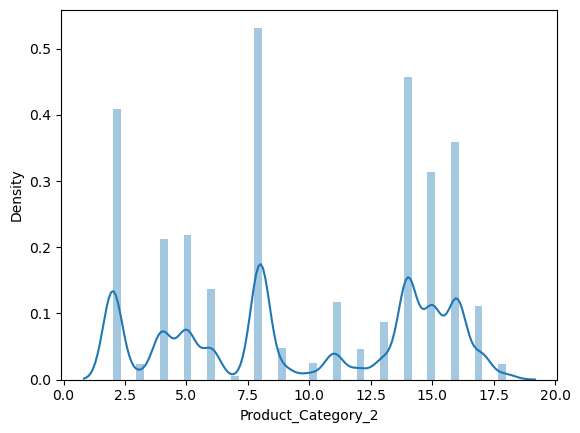

In [22]:
sns.distplot(black_train['Product_Category_2'])
plt.show()

In [23]:
black_train['Product_Category_2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product_Category_2, dtype: int64

In [24]:
black_test=pd.read_csv('test.csv')
black_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [25]:
#merge both test and train data
#final_data=pd.merge(black_train,black_test,on='User_ID',how='left')

In [26]:
df=black_train.append(black_test)

In [27]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [28]:
df.shape

(783667, 12)

In [29]:
black_test.shape

(233599, 11)

In [30]:
black_train.shape

(550068, 12)

In [31]:
df_merge = pd.merge(black_train, black_test, how='outer')


In [32]:
df_merge.shape

(783667, 12)

In [33]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [34]:
df.drop(columns=['User_ID'],inplace=True,axis=1)

In [35]:
df.shape

(783667, 11)

In [36]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [37]:
df.dtypes

Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [38]:
[feature for feature in df.columns if df[feature].isna().sum()>1]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [39]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [40]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [41]:
df_merge['Gender']=df_merge['Gender'].replace({'F':0,'M':1})

In [42]:
df_merge.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0


In [43]:
df_merge.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [44]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [45]:
#Target ordinal Encoding
#we can even use Label Encoding
df['Age']=df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [46]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [47]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [48]:
from sklearn.preprocessing import LabelEncoder

In [49]:
label=LabelEncoder()
df_merge['Age']=label.fit_transform(df_merge['Age'])


In [50]:
df_merge.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,0,0,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,1,6,16,C,4+,0,8,NaN,NaN,7969.0


In [51]:
df.head(2)

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0


In [52]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [53]:
df_city=pd.get_dummies(df['City_Category'],drop_first=True)

In [54]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
233594,1,0
233595,1,0
233596,1,0
233597,0,1


In [55]:
df=pd.concat([df,df_city],axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0,0,1


In [56]:
df.drop('City_Category',axis=1,inplace=True)

In [57]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0,0,0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0,0,1


In [58]:
[feature for feature in df.columns if df[feature].isna().sum()>0]

['Product_Category_2', 'Product_Category_3', 'Purchase']

In [59]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [60]:
dra_missing_data(df)

,Total,Percent
Product_Category_3,545809,69.648078
Product_Category_2,245982,31.388587
Purchase,233599,29.808452
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000


In [61]:
#focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [62]:
df['Product_Category_2'].value_counts().reset_index()

,index,Product_Category_2
0,8.0,91317
1,14.0,78834
2,2.0,70498
3,16.0,61687
4,15.0,54114
5,5.0,37165
6,4.0,36705
7,6.0,23575
8,11.0,20230
9,17.0,19104


In [63]:
a=df['Product_Category_2'].mode()[0]

In [64]:
#replacing the missing values with the mode
df['Product_Category_2']=df['Product_Category_2'].fillna(a)

In [65]:
dra_missing_data(df)

,Total,Percent
Product_Category_3,545809,69.648078
Purchase,233599,29.808452
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,0,0.000000


In [66]:
df['Product_Category_3']=df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [67]:
dra_missing_data(df)

,Total,Percent
Purchase,233599,29.808452
Product_ID,0,0.000000
Gender,0,0.000000
Age,0,0.000000
Occupation,0,0.000000
Stay_In_Current_City_Years,0,0.000000
Marital_Status,0,0.000000
Product_Category_1,0,0.000000
Product_Category_2,0,0.000000
Product_Category_3,0,0.000000


In [68]:
[fe for fe in df.columns if df[fe].isna().sum()>0]

['Purchase']

In [69]:
df['Purchase'].nunique()

18105

In [70]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [71]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].replace({'4+':4})

In [72]:
df['Stay_In_Current_City_Years'].unique()

array(['2', 4, '3', '1', '0'], dtype=object)

In [73]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype('int64')

In [74]:
df['Stay_In_Current_City_Years'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

In [75]:
df.dtypes

Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
B                               uint8
C                               uint8
dtype: object

In [76]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0,0,1


In [77]:
df['B']=df['B'].astype('int64')
df['C']=df['C'].astype('int64')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int64  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 77.7+ MB


In [79]:
#sns.pairplot(df)

<Axes: xlabel='Purchase', ylabel='Density'>

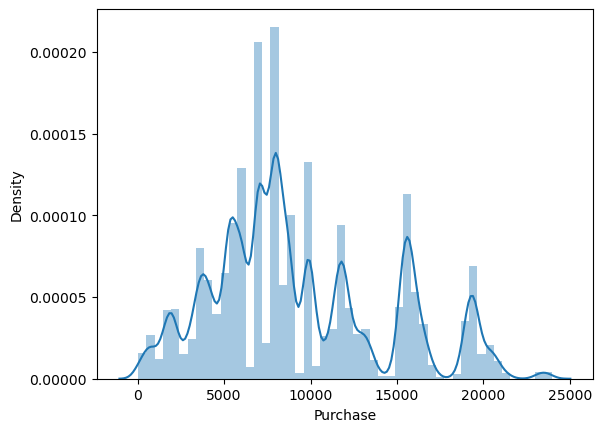

In [80]:
sns.distplot(df['Purchase'],)

In [81]:
#sns.barplot('Age','Purchase',hue='Gender',data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

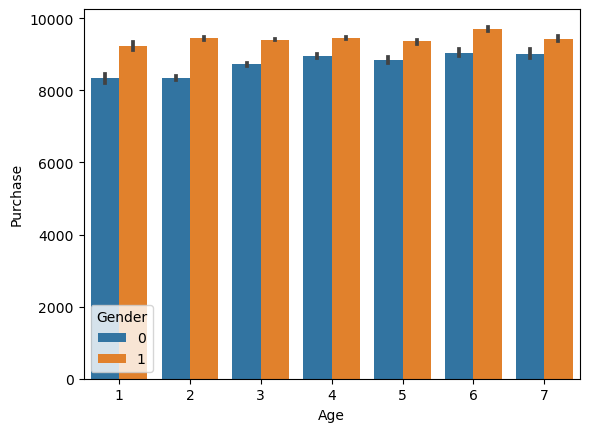

In [82]:
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

# From the above figure we can conclude that Male from all the age category has the most purchases

In [83]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Occupation', ylabel='Purchase'>

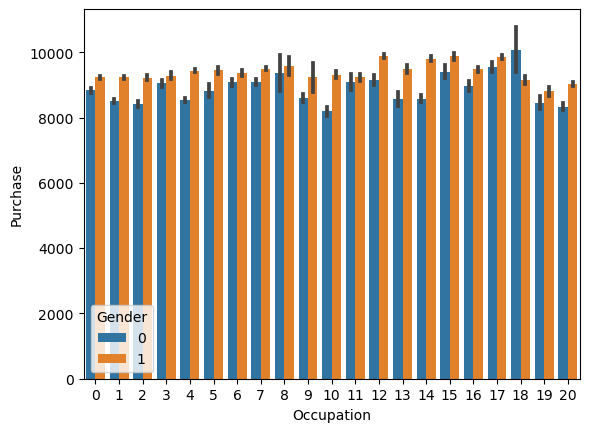

In [84]:
sns.barplot(x='Occupation', y='Purchase', hue='Gender', data=df)

In [85]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

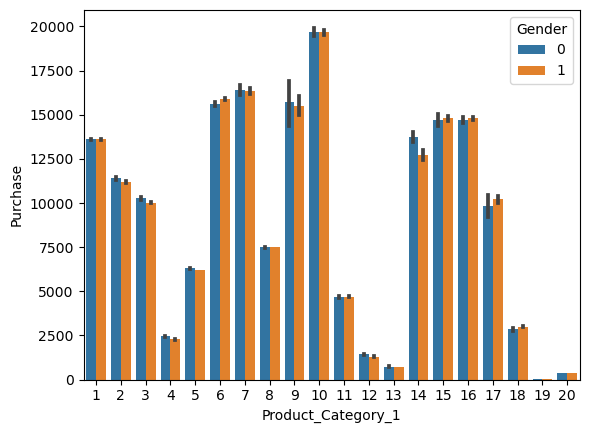

In [86]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

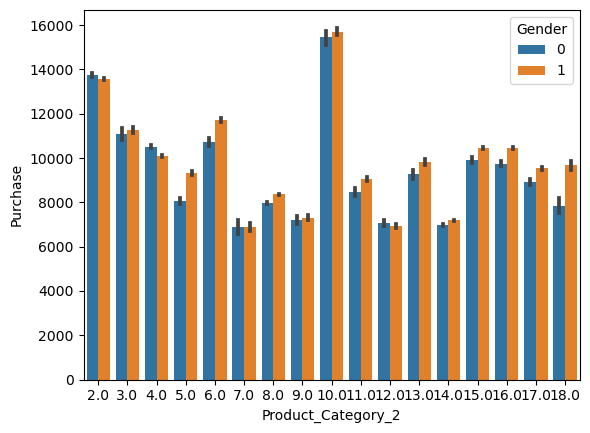

In [87]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Purchase', ylabel='Product_Category_2'>

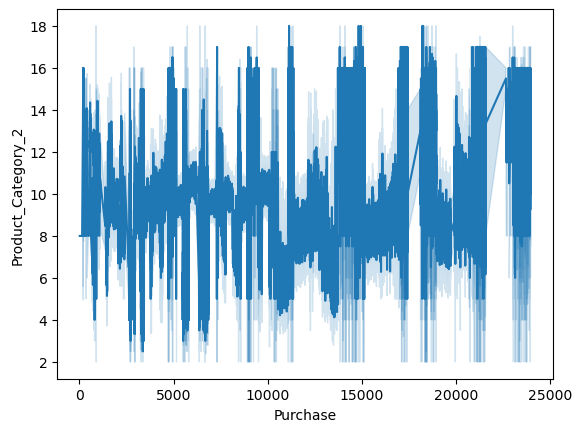

In [89]:
sns.lineplot(x='Purchase',y='Product_Category_2',data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

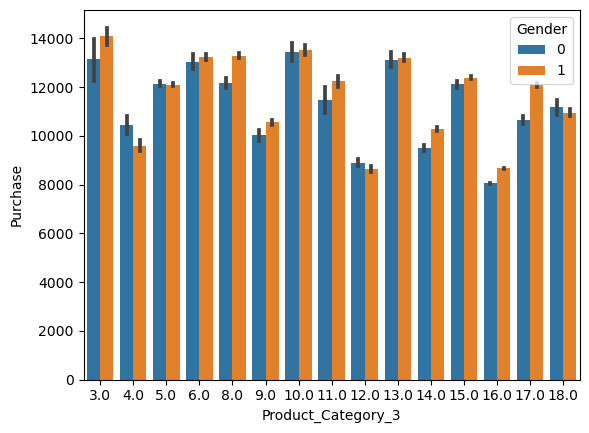

In [88]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [90]:
df.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase', 'B', 'C'],
      dtype='object')

<Axes: xlabel='Product_Category_1', ylabel='Product_Category_2'>

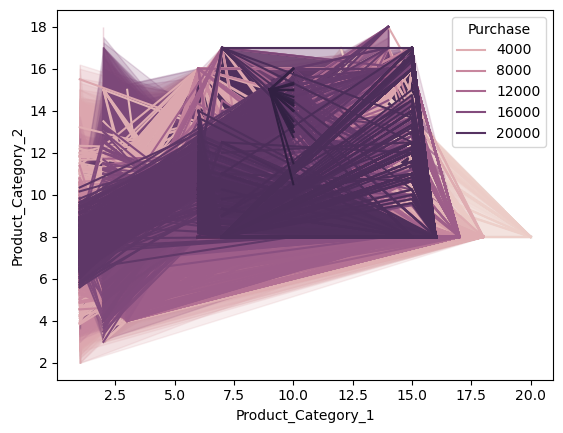

In [91]:
sns.lineplot(x='Product_Category_1',y='Product_Category_2',hue='Purchase',data=df)

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

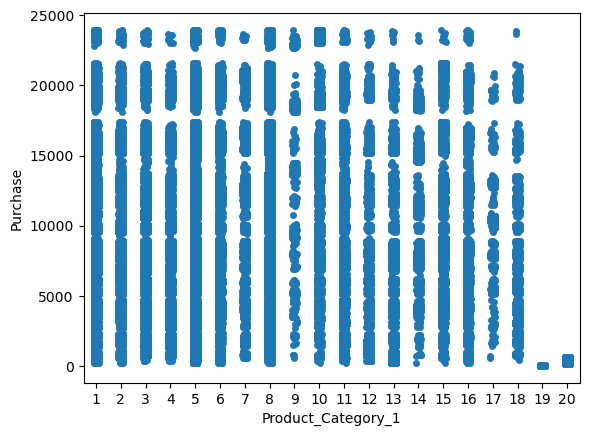

In [92]:
sns.stripplot(x='Product_Category_1', y='Purchase', data=df)